# Домашняя работа №2

In [4]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

In [ ]:
ГС - это совокупность ВСЕХ объектов (данных), относительно которых делается вывод, 
а выборка - это часть объектов (данных), которые выбрали из ГС. Выборка - это часть ГС.

- Если размер выборки больше 200, то такая выборка является репрезентативной?

In [4]:
"""Возможно ДА, но зависит не от размера выборки, а от того включены ли туда все виды объектов  
ГС и от размера самой ГС. Если ГС = миллиону, то конечно выборка 200 штук мала."""

'Возможно ДА, но зависит не от размера выборки, а от того включены ли туда все виды объектов  \nГС и от размера самой ГС. Если ГС = миллиону, то конечно выборка 200 штук мала.'

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

In [ ]:
Длина волос футболистов на ЧМ-2018
Длина волос футболистов из Франции
Длина волос у спортсменов

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

In [ ]:
Взять всю статистику за последние 10 лет в 1 роддоме из Волгограда
Взять всю статистику за первый, третий, шестой и десятый год
Взять случайную выборку определённого количества детей в каждом роддоме

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


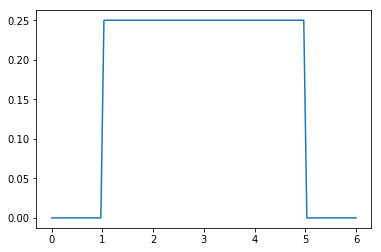

In [4]:
uniform_rv = stats.uniform(1, 4)
uniform_rv.rvs(10)
x = np.linspace(0, 6, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [8]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

#неустойчивое - матожидание
overshoot = np.arange(1000,5000,1000)
sample_with_overshoot = np.append(sample, overshoot)
new_med = np.median(sample_with_overshoot)
new_mean = sample_with_overshoot.mean()
med,mean,new_med,new_mean

(3.4111290208062215, 4.212205463301467, 3.6691081806617385, 185.72404506597047)

- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [9]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#увеличиться на С// увеличиться в С раз
mean = sample.mean()
mean_with_c = (sample+C).mean()
mean_mult_c = (sample*C).mean()
mean,mean_with_c,mean_mult_c

(1.88, 2.38, 0.94)

- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [7]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#при добавлении выбросов, рост дисперсии будет экспоненциальным
overshoot = 1000
sample_with_overshoot = np.append(sample, overshoot)
new_var = sample_with_overshoot.var()
var, new_var

(1.4763740000083303, 19029.1070033817)

- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [14]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)

interq=np.percentile(sample,75)-np.percentile(sample,25)
avg=sample.mean()
r=(avg+sample.var())-(avg-sample.var())
print(interq,r)
"""(X-s, X + s) шире"""

1.3280665763925725 1.9979189998619669


'(X-s, X + s) шире'

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

статистика - количественная характеристика исследуемых параметров, характеризующих распределение случайной величины, полученную на основе исследования выборочных значений. Проще говоря показатели, характеризующие выборку. 

In [10]:
beta_rv = stats.beta(1,3)
sample = beta_rv.rvs(100)
np.median(sample)

0.20478071075548285

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

Оценка матожидания - выборочное среднее

Оценка медианы - средний элемент выборки, отсортированной в порядке возрастания (если кол-во элементов нечетное), либо среднее арифметическое двух соседних средних элементов, если кол-ыо элементов в выборке четное

Оценка дисперсии - выборочная дисперсия

In [11]:
gamma_rv = stats.gamma(2,2)
sample_g = gamma_rv.rvs(100)
mean = sample_g.mean()
var = sample_g.var()
med = np.median(sample_g)
mean,var,med


(4.104842948691741, 1.9766805039205653, 3.8586240377917296)

- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

В соответствии с ЦПТ Х стремится к нормальному распределению.
Математическое ожидание будет стремиться к выборочному среднему.
Дисперсия будет стремиться к выборочной дисперсии.

/home/semen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ВЫборочное среднее равно: 4.999137192901065


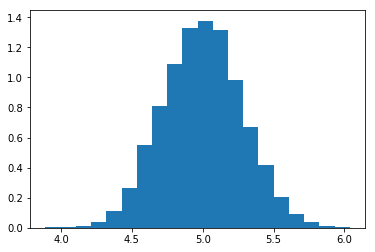

In [15]:
#your code here
norm_rv = stats.norm(5,2)
mean = []
for i in range(10000):
    sample = norm_rv.rvs(50)
    mean.append(sample.mean())
plt.hist(mean, 20, normed=True)
print("ВЫборочное среднее равно: {}".format(np.array(mean).mean()))

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

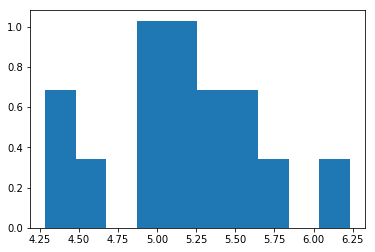

In [16]:
norm_1 = stats.norm(5, 2)
norm_2 = stats.norm(2, 1)
means = []
for i in range(15):
    sample = norm_1.rvs(10)
    means.append(sample.mean())

plt.hist(means, density=True)
plt.show()

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [17]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(100)
mean = sample.mean()
var = sample.var() ** .5
new_rv = []
[ new_rv.append((val - mean)/var) for val in sample ]
new_rv = np.array(new_rv)
new_mean = round(new_rv.mean(), 3)
new_var = new_rv.var() ** .5
print(f'Новое матожидание: {new_mean}, новая дисперсия: {new_var}')

Новое матожидание: -0.0, новая дисперсия: 0.9999999999999998


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [29]:
chi_rv = stats.chi2 (10)
DI_90 = chi_rv.ppf(q=0.90)
DI_90

15.987179172105263

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [31]:
student_rv=stats.t(15)
student_rv.ppf(0.9),student_rv.ppf(0.95)

(1.3406056078504547, 1.7530503556925547)

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [24]:
norm_rv = stats.norm(0, 2)
n1 = 1000
n2 = 2000
vib1 = norm_rv.rvs(n1)
vib2 = norm_rv.rvs(n2)
vib1_mat = vib1.mean()
vib1_var = vib1.var()
vib1_sigma = vib1_var ** 0.5
v11_90 = vib1_mat - vib1_sigma/(n1**0.5)*1.64
v12_90 = vib1_mat + vib1_sigma/(n1**0.5)*1.64
vib2_mat = vib2.mean()
vib2_var = vib2.var()
vib2_sigma = vib2_var ** 0.5
v21_90 = vib2_mat - vib2_sigma/(n2**0.5)*1.64
v22_90 = vib2_mat + vib2_sigma/(n2**0.5)*1.64

print('Доверительный интервал для маленькой выборки', v11_90, v12_90)
print('Доверительный интервал для большой выборки', v21_90, v22_90)
print('Чем больше выборка, тем уже(достоверней) дов интервал', v12_90 - v11_90, v22_90-v21_90 )

Доверительный интервал для маленькой выборки -0.08629694075213529 0.11719660791736819
Доверительный интервал для большой выборки -0.034757427651764525 0.11052068595537105
Чем больше выборка, тем уже(достоверней) дов интервал 0.20349354866950348 0.14527811360713558


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
ошибка второго рода

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
-
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


1.Не верно, т.к. это вероятность отклонить нулевую гипотезу, когда на самом деле она верна. 
2.Неверное отверждение, мы лишь можем сказать, что Нет оснований отклонять основную гипотезу на данном этапе.
3.Спорно, Чем меньше уровень значимости, тем меньше вероятность нашего наблюдения при условии истинности основной гипотезы


- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

Если, рисковано отклонять, то 0.01 
в большинстве практических задач  99%вполне достаточно.

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

С увеличением кол-ва степеней свободы, распредедение стьюдента стремится к нормальному.  
 Чем меньше степеней свободы, тем хвосты выше (дисперсия больше)


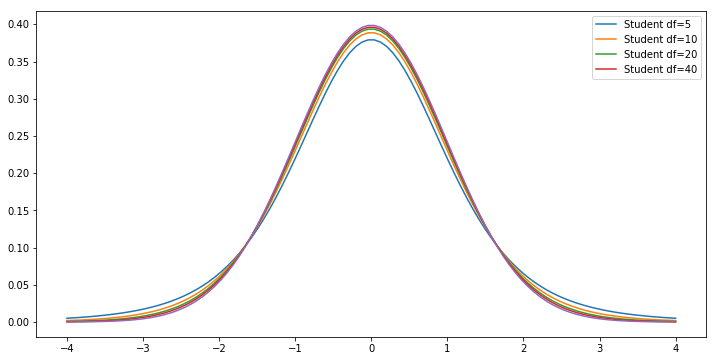

In [22]:
t_rv_5 = stats.t(5)
t_rv_10 = stats.t(10)
t_rv_20 = stats.t(20)
t_rv_40 = stats.t(40)
norm_rv = stats.norm(0, 1)
x = np.linspace(-4, 4, 100)
plt.figure(figsize=(12,6))
pdf_5 = t_rv_5.pdf(x)
pdf_10 = t_rv_10.pdf(x)
pdf_20 = t_rv_20.pdf(x)
pdf_40 = t_rv_40.pdf(x)
pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_5)
plt.plot(x, pdf_10)
plt.plot(x, pdf_20)
plt.plot(x, pdf_40)
plt.plot(x, pdf_norm)
plt.legend(['Student df=5', 'Student df=10', 'Student df=20', 'Student df=40'])
print("С увеличением кол-ва степеней свободы, распредедение стьюдента стремится к нормальному.  \n Чем меньше степеней свободы, тем хвосты выше (дисперсия больше)")

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

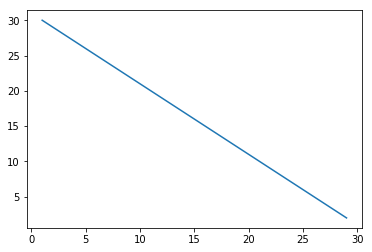

In [46]:
a=np.arange(1,30,1)
b=np.arange(30,1,-1) 
plt.plot(a, b)

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

0.0


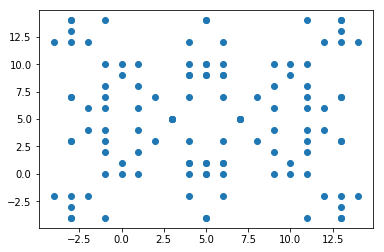

In [43]:
import random
xmean=5
ymean=5
x=[]
y=[]
for i in range(0,30):
    rnd1=random.randint(0,9)
    rnd2=random.randint(0,9)
    x.append(xmean-rnd1)
    y.append(ymean-rnd2)
    x.append(xmean-rnd1)
    y.append(ymean+rnd2)
    x.append(xmean+rnd1)
    y.append(ymean+rnd2)
    x.append(xmean+rnd1)
    y.append(ymean-rnd2)  
plt.scatter(x,y)
corr, p_value=stats.pearsonr(x,y)
print(corr)

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [38]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))
ordered_sample=sorted(sample)
rank_1=0
rank_2=0
for i in range (0,len(ordered_sample)):
    if ordered_sample[i] in sample_1:
        rank_1+=i
    else: 
        rank_2+=i
print("Ранг 1 {} Ранг 2 {}".format(rank_1,rank_2))

Ранг 1 10113 Ранг 2 9787
